## Pill 6: SVM Deliverable

Blai Ras Jimenez

<div class = "alert alert-danger" style = "border-radius:10px">**DELIVERABLE: ** We want to modify the soft-margin SVM to be able to accomodate unbalanced data. Describe how to change the formulation such that we can control the balance of the errors from each class. Code an example and apply it to the following problem.</div>

In [1]:
from cvxpy import *
import numpy as np
import matplotlib.pyplot as plt

(320, 2) (320,)


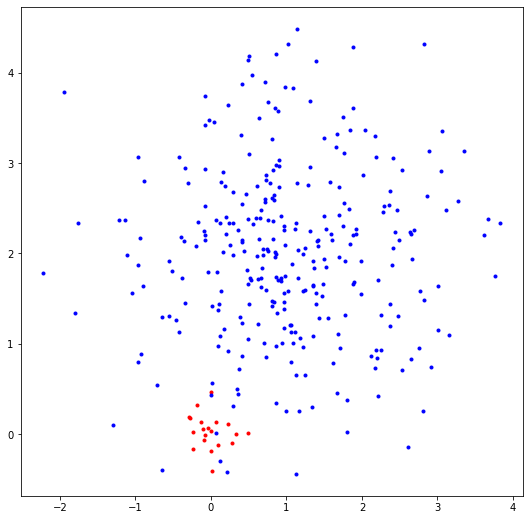

In [14]:
%matplotlib inline


m1 = [0.,0.]
s1 = [[0.05,0],[0,0.05]]
m2 = [1.,2.]
s2 = [[1,0],[0,1]]
c1 = np.random.multivariate_normal(m1,s1,20)
c2 = np.random.multivariate_normal(m2,s2,300)


x= np.r_[c1,c2]
y= np.r_[-np.ones(c1.shape[0]),np.ones(c2.shape[0])]


print (x.shape,y.shape)



plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')


plt.gcf().set_size_inches((9,9))

[Following this paper](https://arxiv.org/pdf/1306.3161.pdf), in section 2.2, the Weighted Support Vector Machine problem is described as following:

$ \begin{align*} 
    \min_{w,b,\xi} \frac12 \lVert w \rVert^2 + \sum_{i=1}^n c_i \xi_i
\end{align*} $

With constraints:

$
y_i(\langle w,z_i \rangle +b) \geq 1 - \xi_i $

$
\xi_i \geq 0
$

Meaning that each instance $(x_i,y_i)$ is assigned an importance weight $c_i \in \mathbb{R}$. Notice that the constant $\frac12$ that is shown in the paper is not included since you did not include it on your previous example on a much simpler case. Therefore, I decided to not include it also. Nevertheless, it does not affect much on the final result.


In [15]:
def WSGM(C=100):
    #your code
    #my code

    d = x.shape[1] 
    N = x.shape[0]
    C = 100.

    w  = [ N/(2*sum(y==-1).value), N/(2*sum(y==1).value) ]
    c = np.zeros(y.shape)
    c[y==-1.] = w[0]
    c[y==1.]  = w[1]

    # Declare variables
    a = Variable(d)
    b = Variable()
    eps = Variable(N)

    # Construct the problem.
    #If you want to try with the 1/2
    #objective= Minimize(0.5*norm(a,2) + C*sum(multiply(c, eps)) )

    objective= Minimize(norm(a,2) + C*sum(multiply(c, eps)) )
    constraints= [eps>=0, multiply((x@a+b),y)>=1-eps]

    prob = Problem(objective,constraints)
    print(prob.solve())
    print(prob.status)
    print(a.value)

In [16]:
def plot():
        xx,yy = np.meshgrid(np.linspace(-3,6,200),np.linspace(-4,6,200))
        viz=np.c_[xx.ravel(),yy.ravel()]


        z = np.dot(viz,a.value)+b.value

        plt.plot(c1[:,0],c1[:,1],'r.')
        plt.plot(c2[:,0],c2[:,1],'b.')
        plt.gca().set_xlim([-3.,6.])
        plt.gca().set_ylim([-4.,6.])
        plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-3,6,-4,6),alpha=0.3, vmin=-1, vmax=1)
        plt.contour(xx,yy,z.reshape((200,200)),[-1.,0.,1.])

        plt.gcf().set_size_inches((9,9))

2387.2683638298936
optimal
[1.29327515 2.8251692 ]


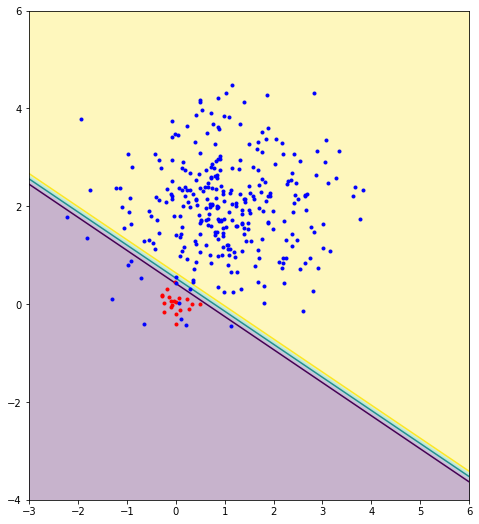

In [17]:
WSGM()
plot()

2387.2683638298936
optimal
[1.29327515 2.8251692 ]


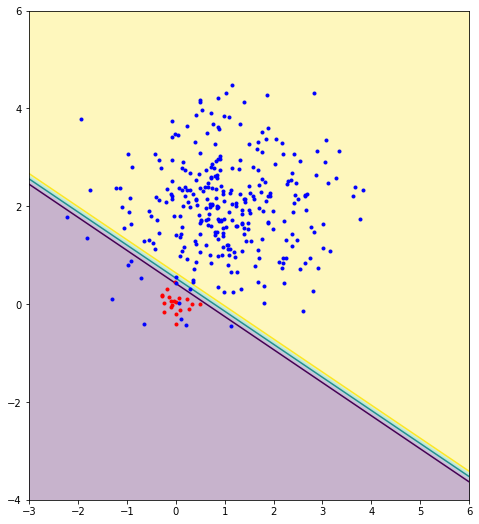

In [19]:
WSGM(C=0)
plot()

In [ ]:
WSGM(C=0)
plot()